<a href="https://colab.research.google.com/github/lloyd31/gan-analysis-db/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA Analysis**

In [1]:
import numpy as np
import pandas as pd

In [2]:
#CLone the dataset and prepare the d
!git clone https://github.com/lloyd31/gan-analysis-db.git

Cloning into 'gan-analysis-db'...
remote: Enumerating objects: 8202, done.
remote: Counting objects: 100% (945/945), done.
remote: Compressing objects: 100% (944/944), done.
remote: Total 8202 (delta 0), reused 944 (delta 0), pack-reused 7257
Receiving objects: 100% (8202/8202), 528.03 MiB | 28.21 MiB/s, done.
Resolving deltas: 100% (11/11), done.
Checking out files: 100% (8200/8200), done.


In [ ]:
#!ls -l /content

total 8
drwxr-xr-x 8 root root 4096 Mar 18 07:29 gan-analysis-db
drwxr-xr-x 1 root root 4096 Mar  9 14:48 sample_data


In [ ]:
#%cd /content/gan-analysis-db/

/content/gan-analysis-db


In [ ]:
#!git pull origin main

remote: Enumerating objects: 510, done.
remote: Counting objects: 100% (510/510), done.
remote: Compressing objects: 100% (503/503), done.
remote: Total 506 (delta 1), reused 506 (delta 1), pack-reused 0
Receiving objects: 100% (506/506), 69.87 MiB | 39.38 MiB/s, done.
Resolving deltas: 100% (1/1), completed with 1 local object.
From https://github.com/lloyd31/gan-analysis-db
 * branch            main       -> FETCH_HEAD
   29b7713..4417548  main       -> origin/main
Updating 29b7713..4417548
Fast-forward
 ffhqTest/ffhq/test/R_FFHQ_19499.png | Bin 0 -> 156083 bytes
 ffhqTest/ffhq/test/R_FFHQ_19500.png | Bin 0 -> 141428 bytes
 ffhqTest/ffhq/test/R_FFHQ_19501.png | Bin 0 -> 148242 bytes
 ffhqTest/ffhq/test/R_FFHQ_19502.png | Bin 0 -> 149749 bytes
 ffhqTest/ffhq/test/R_FFHQ_19503.png | Bin 0 -> 158754 bytes
 ffhqTest/ffhq/test/R_FFHQ_19504.png | Bin 0 -> 133809 bytes
 ffhqTest/ffhq/test/R_FFHQ_19505.png | Bin 0 -> 148122 bytes
 ffhqTest/ffhq/test/R_FFHQ_19506.png | Bin 0 -> 120972 bytes
 

In [ ]:
%cd ../
%pwd

/content


'/content'

**Data distribution**

In [3]:
import os

_100fCount = len(os.listdir('/content/gan-analysis-db/ifakePath/iFakeFaceDB/100F'))
_tpndeCount = len(os.listdir('/content/gan-analysis-db/ifakePath/iFakeFaceDB/TPDNE'))

ganFakeCount = _100fCount + _tpndeCount
ganFakeCount

3999

In [4]:
##CNNN datset by Wang et al.
_cnnCarFake = len(os.listdir('/content/gan-analysis-db/cnnTest/car/1_fake/'))
_cnnPeopleFake = len(os.listdir('/content/gan-analysis-db/cnnTest/person/1_fake/'))
_cnnDogFake = len(os.listdir('/content/gan-analysis-db/cnnTest/dog/1_fake/'))
_cnnDogReal = len(os.listdir('/content/gan-analysis-db/cnnTest/dog/0_real//'))
_cnnPeopleReal = len(os.listdir('/content/gan-analysis-db/cnnTest/person/0_real/'))
_cnnCarReal = len(os.listdir('/content/gan-analysis-db/cnnTest/car/0_real/'))

cnnFakeCount = _cnnPeopleFake + _cnnCarFake + _cnnDogFake
cnnRealCount = _cnnCarReal + _cnnDogReal + _cnnPeopleReal
(cnnRealCount, cnnFakeCount)

(600, 600)

In [5]:
#DFFD dataset
_ffhqReal = len(os.listdir('/content/gan-analysis-db/ffhqTest/ffhq/test/'))
_pgGANFake = len(os.listdir('/content/gan-analysis-db/pggan_v2/test/'))
_styleGANFake = len(os.listdir('/content/gan-analysis-db/stylegan_celeba/test/'))
dffdFakeCount = _pgGANFake + _styleGANFake
dffdRealCount = _ffhqReal
print(_ffhqReal, _pgGANFake, _styleGANFake)
(dffdRealCount, dffdFakeCount)

1000 499 499


(1000, 998)

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

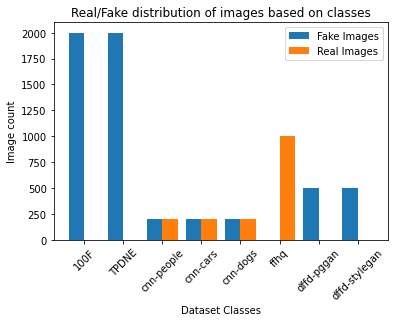

In [7]:
##Real and fake distribution

imageClasses = ['100F', 'TPDNE','cnn-people','cnn-cars', 'cnn-dogs', 'ffhq', 'dffd-pggan','dffd-stylegan']
fakes = [_100fCount,_tpndeCount,_cnnPeopleFake,_cnnCarFake, _cnnDogFake, 0, _pgGANFake, _styleGANFake]
real = [0,0,_cnnPeopleReal,_cnnCarReal, _cnnDogReal, _ffhqReal, 0,0]
  
X_axis = np.arange(len(imageClasses))
  
plt.bar(X_axis - 0.2, fakes, 0.4, label  = 'Fake Images')
plt.bar(X_axis + 0.2, real, 0.4, label  = 'Real Images')
  
plt.xticks(X_axis, imageClasses, rotation = 45)
plt.xlabel("Dataset Classes")
plt.ylabel("Image count")
plt.title("Real/Fake distribution of images based on classes")
plt.legend()
plt.show()

In [8]:
totalFakeCount = ganFakeCount + cnnFakeCount + dffdFakeCount
totalRealCount = cnnRealCount+dffdRealCount

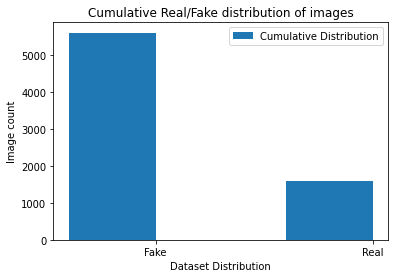

In [9]:
## Cumulative Fake and Real Count
imageClasses = ['Fake', 'Real']
data = [totalFakeCount, totalRealCount]
  
X_axis = np.arange(len(imageClasses))
  
plt.bar(X_axis - 0.2, data, 0.4, label  = 'Cumulative Distribution')
  
plt.xticks(X_axis, imageClasses)
plt.xlabel("Dataset Distribution")
plt.ylabel("Image count")
plt.title("Cumulative Real/Fake distribution of images")
plt.legend()
plt.show()

**Image resolution of images in different datasets**

In [13]:
### GAN Dataset
from PIL import Image


In [10]:

def getDistinctImageSizes(folderPath):
  sizeSet = set()
  for path, dirs, files in os.walk(folderPath):
    for fileName in files:
      im = Image.open(os.path.join(path, fileName))
      sizeSet.add(im.size)
  return sizeSet

In [11]:
ganImageResolution = set()
cnnImageResolutions = set()
dffdImageResolutions = set()

In [14]:
cnnImageResolutions = getDistinctImageSizes("/content/gan-analysis-db/cnnTest/")
ganImageResolution = getDistinctImageSizes("/content/gan-analysis-db/ifakePath/")
dffdImageResolutions = getDistinctImageSizes("/content/gan-analysis-db/ffhqTest/")
dffdImageResolutions.update(getDistinctImageSizes("/content/gan-analysis-db/stylegan_celeba/")) 
dffdImageResolutions.update(getDistinctImageSizes("/content/gan-analysis-db/pggan_v2/"))
(cnnImageResolutions, ganImageResolution, dffdImageResolutions) 

({(256, 256)}, {(224, 224)}, {(299, 299)})

In [15]:
from tabulate import tabulate
print(tabulate([['iFakeFaceDB', ganImageResolution], ['CNN-dataset', cnnImageResolutions], ['DFFD', dffdImageResolutions]],headers=['Dataset', 'Resolutions']))

Dataset      Resolutions
-----------  -------------
iFakeFaceDB  {(224, 224)}
CNN-dataset  {(256, 256)}
DFFD         {(299, 299)}
